In [23]:
#importing the required packages
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import tensorflow as tf

In [24]:
#generating train data
train_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [26]:

train_generator = train_datagen.flow_from_directory(
directory="FRUITS/FRUITS/Training32",
target_size=(32, 32),
color_mode="rgb",
batch_size=128,
class_mode="categorical",
shuffle=True,
seed=42
)

Found 12642 images belonging to 25 classes.


In [27]:
valid_generator = valid_datagen.flow_from_directory(
directory="FRUITS/FRUITS/Test32",
target_size=(32, 32),
color_mode="rgb",
batch_size=128,
class_mode="categorical",
shuffle=True,
seed=42
)


Found 4232 images belonging to 25 classes.


In [41]:

# CNN model with 3 layers 
model = Sequential()


model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))



model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(25))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)             

In [42]:
#Defining the optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [43]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
optimizer=opt,
metrics=['accuracy'])

In [44]:
#fit the model
model.fit_generator(
train_generator,
steps_per_epoch=90,
epochs=5,
validation_data=valid_generator,
validation_steps=100)

Epoch 1/5
90/90 [==============================] - 29s 313ms/step - loss: 2.0705 - accuracy: 0.4149 - val_loss: 1.0059 - val_accuracy: 0.7143
Epoch 2/5
90/90 [==============================] - 22s 242ms/step - loss: 0.7485 - accuracy: 0.7748
Epoch 3/5
90/90 [==============================] - 22s 242ms/step - loss: 0.4091 - accuracy: 0.8793
Epoch 4/5
90/90 [==============================] - 22s 242ms/step - loss: 0.2763 - accuracy: 0.9184
Epoch 5/5
90/90 [==============================] - 22s 245ms/step - loss: 0.1958 - accuracy: 0.9411


In [45]:
#Predict a single image
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("FRUITS/FRUITS/Test32/Apple Braeburn/3_100.jpg")


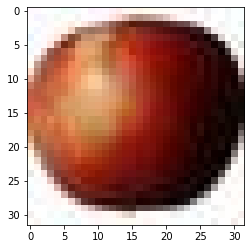

In [46]:
#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img) # get b,g,r
rgb_img = cv2.merge([r,g,b]) # switch it to rgb

plt.imshow(rgb_img)

In [47]:
img_rank4 = np.expand_dims(rgb_img/255, axis=0)

In [48]:
#predicting the model
a=model.predict(img_rank4)

In [49]:

np.round(a)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
classes_x=np.argmax(a,axis=1)

In [51]:
label_map = (train_generator.class_indices)

In [52]:
label_map

{'Apple Braeburn': 0,
 'Apple Golden 1': 1,
 'Apple Golden 2': 2,
 'Apple Golden 3': 3,
 'Apple Granny Smith': 4,
 'Apple Red 1': 5,
 'Apple Red 2': 6,
 'Apple Red 3': 7,
 'Apple Red Delicious': 8,
 'Apple Red Yellow': 9,
 'Apricot': 10,
 'Avocado': 11,
 'Avocado ripe': 12,
 'Banana': 13,
 'Banana Red': 14,
 'Cactus fruit': 15,
 'Cantaloupe 1': 16,
 'Cantaloupe 2': 17,
 'Carambula': 18,
 'Cherry 1': 19,
 'Cherry 2': 20,
 'Cherry Rainier': 21,
 'Cherry Wax Black': 22,
 'Cherry Wax Red': 23,
 'Cherry Wax Yellow': 24}

In [53]:
list(label_map.keys())[classes_x[0]]

'Apple Braeburn'

In [54]:
#From the previous model I have removed layer in to CNN architecture which helped to increase the accuracy of the CNN model.
#As the accuracy was 86% now it increased to 94% by removing a convolution and maxpooling layer.